In [1]:
%matplotlib inline

In [57]:
import sys
import dlib
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import dlib
import glob

In [38]:
# imagePath = "/datascience/data/imdb-wiki/imdb/03/nm0405103_rm1003861504_1990-11-24_2009.jpg"
imagePath = "/datascience/data/imdb-wiki/imdb/03/nm0405103_rm1007403008_1990-11-24_2014.jpg"
# imagePath = "/datascience/data/imdb-wiki/imdb/01/nm0000001_rm124825600_1899-5-10_1968.jpg"
# imagePath = "/datascience/data/imdb-wiki/imdb/01/nm0000001_rm946909184_1899-5-10_1968.jpg"

In [7]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

In [62]:
def show_image(arr):
    plt.imshow(cv2.cvtColor(arr, cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [63]:
def detect_face(imagePath):
    img = cv2.imread(imagePath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    detections = detector(gray, 1)
    print("Number of faces detected: {}".format(len(detections)))

    faces = []
    for k,d in enumerate(detections): 
        width = d.right() - d.left()
        height = d.bottom() - d.top()
        if width*height*100 / (gray.shape[0]*gray.shape[1]) < 0.05:
            print("Skipping ", width, height)
            continue
        crop_img = img[d.top():d.bottom(),d.left():d.right()]
        faces.append(crop_img)
    
    show_image(img)
    for f in faces:
        show_image(f)

Number of faces detected: 3


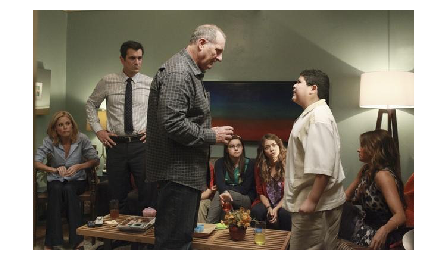

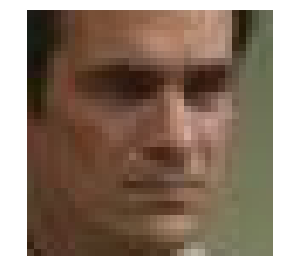

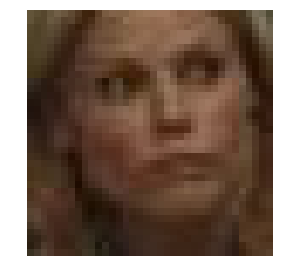

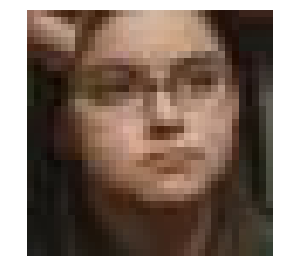

--------------------------------------------------------------------------------
Number of faces detected: 5


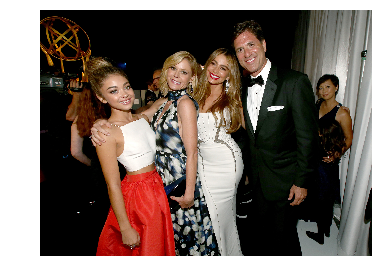

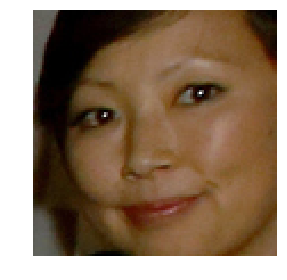

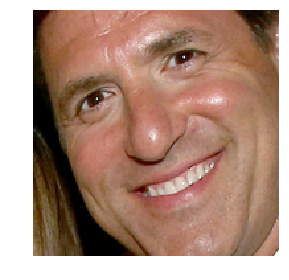

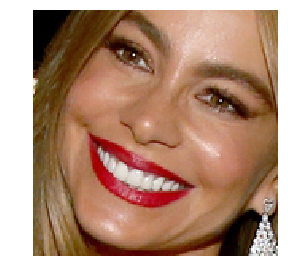

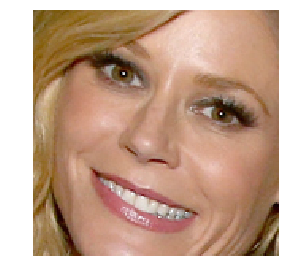

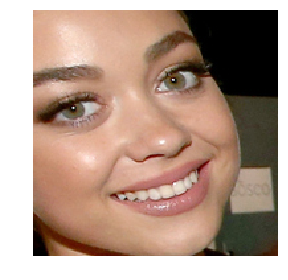

--------------------------------------------------------------------------------
Number of faces detected: 0


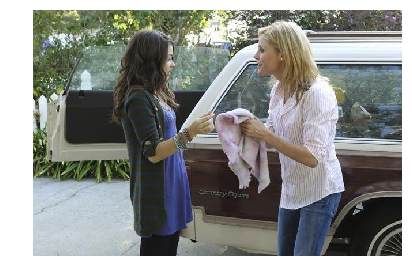

--------------------------------------------------------------------------------
Number of faces detected: 1


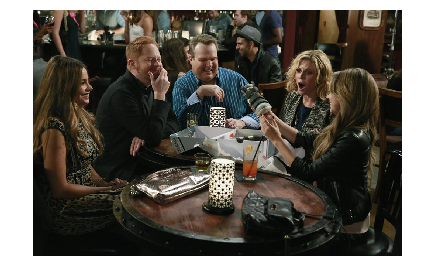

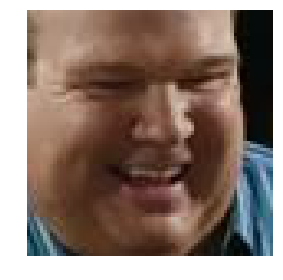

--------------------------------------------------------------------------------
Number of faces detected: 0


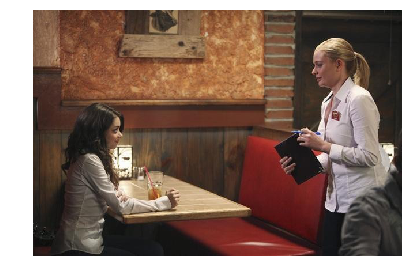

--------------------------------------------------------------------------------
Number of faces detected: 1


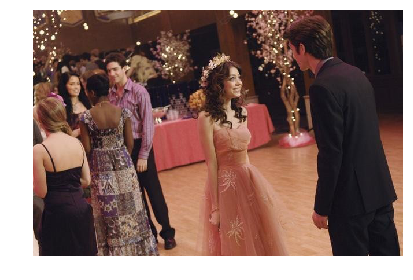

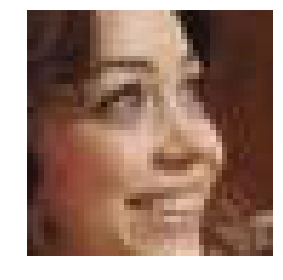

--------------------------------------------------------------------------------
Number of faces detected: 2


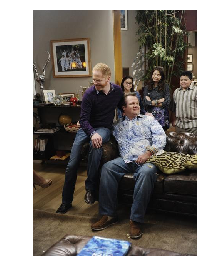

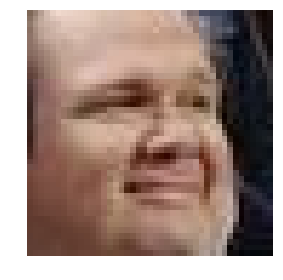

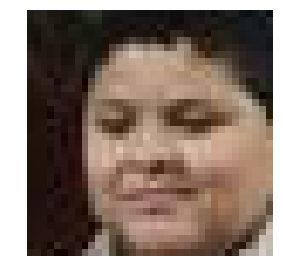

--------------------------------------------------------------------------------
Number of faces detected: 1


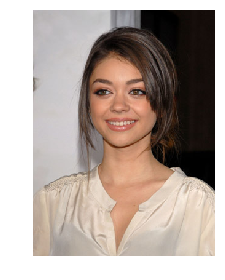

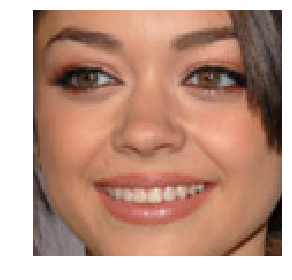

--------------------------------------------------------------------------------
Number of faces detected: 0


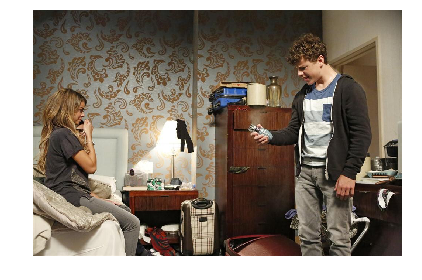

--------------------------------------------------------------------------------
Number of faces detected: 1


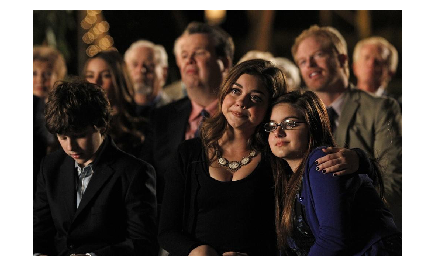

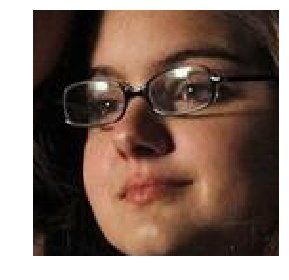

--------------------------------------------------------------------------------
Number of faces detected: 0


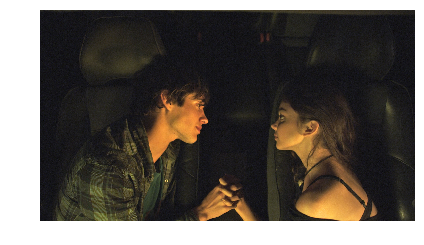

--------------------------------------------------------------------------------
Number of faces detected: 1


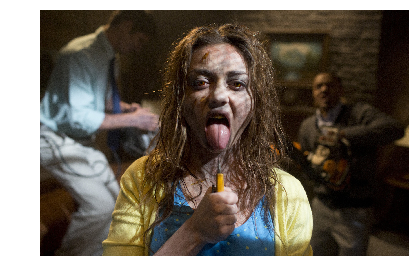

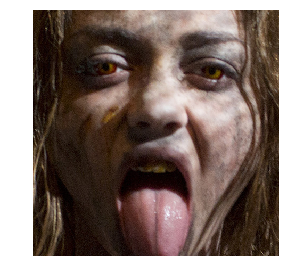

--------------------------------------------------------------------------------


In [65]:
i = 0
for l in glob.glob("/datascience/data/imdb-wiki/imdb/03/nm0405103*"):
    detect_face(l)
    print("-"*80)
    if i > 10:
        break
    i+=1